In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import calendar

In [3]:
#For Sale Listings - Median List Price: The median price at which homes across various geographies were listed.
#Check the structure of the data

df = pd.read_csv('Metro_mlp_uc_sfr_sm_month.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,262433.0,270467.0,277133.0,280500.0,280800.0,...,374000.0,381667.0,389667.0,396167.0,399167.0,397833.0,396333.0,393300.0,389967.0,384633.0
1,394913,1,"New York, NY",msa,NY,492633.0,499333.0,507966.0,516633.0,522967.0,...,634633.0,644967.0,658300.0,666667.0,676600.0,676998.0,681938.0,684967.0,687902.0,687629.0
2,753899,2,"Los Angeles, CA",msa,CA,778333.0,791667.0,799667.0,806300.0,805967.0,...,929966.0,961633.0,981333.0,1014667.0,1058000.0,1085000.0,1100000.0,1075000.0,1065000.0,1033333.0
3,394463,3,"Chicago, IL",msa,IL,295800.0,309133.0,317600.0,321567.0,319933.0,...,309967.0,320000.0,329967.0,337967.0,344300.0,344333.0,342666.0,336333.0,332167.0,325833.0
4,394514,4,"Dallas, TX",msa,TX,325253.0,330319.0,333613.0,333632.0,330298.0,...,404630.0,416630.0,432667.0,444300.0,448967.0,446300.0,442833.0,437167.0,432167.0,427300.0


In [4]:
#Check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    927 non-null    int64  
 1   SizeRank    927 non-null    int64  
 2   RegionName  927 non-null    object 
 3   RegionType  927 non-null    object 
 4   StateName   926 non-null    object 
 5   2018-03-31  890 non-null    float64
 6   2018-04-30  890 non-null    float64
 7   2018-05-31  890 non-null    float64
 8   2018-06-30  890 non-null    float64
 9   2018-07-31  890 non-null    float64
 10  2018-08-31  890 non-null    float64
 11  2018-09-30  890 non-null    float64
 12  2018-10-31  890 non-null    float64
 13  2018-11-30  890 non-null    float64
 14  2018-12-31  890 non-null    float64
 15  2019-01-31  890 non-null    float64
 16  2019-02-28  890 non-null    float64
 17  2019-03-31  890 non-null    float64
 18  2019-04-30  891 non-null    float64
 19  2019-05-31  891 non-null    f

In [5]:
#Check the structure of the data

df.describe()

,RegionID,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
count,927.00000,927.000000,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02,...,9.240000e+02,9.240000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.270000e+02,9.270000e+02,9.270000e+02
mean,425547.20712,468.987055,2.238975e+05,2.275956e+05,2.309869e+05,2.337905e+05,2.345410e+05,2.337943e+05,2.328368e+05,2.318637e+05,...,3.097626e+05,3.160278e+05,3.227962e+05,3.291738e+05,3.337362e+05,3.352628e+05,3.349076e+05,3.328537e+05,3.308909e+05,3.293123e+05
std,105862.60445,270.996692,1.579495e+05,1.570266e+05,1.553012e+05,1.551098e+05,1.548692e+05,1.543522e+05,1.541164e+05,1.536098e+05,...,2.222567e+05,2.212322e+05,2.220416e+05,2.258993e+05,2.308167e+05,2.329883e+05,2.328647e+05,2.318095e+05,2.311800e+05,2.331040e+05
min,102001.00000,0.000000,6.456700e+04,6.620000e+04,6.900000e+04,6.913300e+04,6.900000e+04,6.550000e+04,6.130000e+04,6.060000e+04,...,5.216700e+04,5.666500e+04,5.828200e+04,6.161500e+04,6.328300e+04,6.833300e+04,7.500000e+04,8.108300e+04,7.950000e+04,7.690000e+04
25%,394556.50000,234.500000,1.392498e+05,1.425622e+05,1.461415e+05,1.483085e+05,1.496705e+05,1.498498e+05,1.493998e+05,1.482335e+05,...,1.849790e+05,1.900785e+05,1.982670e+05,2.046330e+05,2.088000e+05,2.114330e+05,2.111000e+05,2.100835e+05,2.064420e+05,2.041000e+05
50%,394813.00000,470.000000,1.797835e+05,1.840000e+05,1.873585e+05,1.901835e+05,1.915025e+05,1.907285e+05,1.899165e+05,1.885790e+05,...,2.530000e+05,2.563920e+05,2.601670e+05,2.670500e+05,2.732330e+05,2.746170e+05,2.746670e+05,2.728000e+05,2.710330e+05,2.693000e+05
75%,395074.00000,702.500000,2.530915e+05,2.599585e+05,2.648915e+05,2.682670e+05,2.689788e+05,2.668168e+05,2.643418e+05,2.638250e+05,...,3.531455e+05,3.629455e+05,3.682500e+05,3.749670e+05,3.796000e+05,3.773000e+05,3.782500e+05,3.764665e+05,3.756665e+05,3.714580e+05
max,845172.00000,939.000000,1.524167e+06,1.421667e+06,1.313333e+06,1.403667e+06,1.452000e+06,1.484000e+06,1.495000e+06,1.488333e+06,...,2.233000e+06,2.161667e+06,2.226667e+06,2.326667e+06,2.443333e+06,2.444833e+06,2.452333e+06,2.405667e+06,2.389000e+06,2.364833e+06


Create Dataframes for the states we have selected: CA, TX, FL, NY, PA

In [6]:
df_california = df[df['StateName']== 'CA']
df_california

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
2,753899,2,"Los Angeles, CA",msa,CA,778333.0,791667.0,799667.0,806300.0,805967.0,...,929966.0,961633.0,981333.0,1014667.0,1058000.0,1085000.0,1100000.0,1075000.0,1065000.0,1033333.0
12,395057,12,"San Francisco, CA",msa,CA,895731.0,946083.0,978000.0,989667.0,972667.0,...,1114667.0,1164667.0,1214667.0,1216333.0,1209666.0,1175999.0,1174333.0,1179333.0,1180000.0,1147667.0
13,395025,13,"Riverside, CA",msa,CA,389967.0,394933.0,398267.0,399900.0,399767.0,...,550000.0,555000.0,563333.0,571667.0,575000.0,573300.0,573300.0,574967.0,579999.0,581332.0
17,395056,17,"San Diego, CA",msa,CA,702667.0,715000.0,721633.0,727967.0,724633.0,...,896000.0,915667.0,932633.0,962633.0,995967.0,1011000.0,1006333.0,973300.0,957967.0,949633.0
26,395045,26,"Sacramento, CA",msa,CA,442633.0,454300.0,458300.0,461333.0,456333.0,...,596000.0,608983.0,620983.0,635983.0,643000.0,647667.0,647633.0,639633.0,626300.0,611333.0
35,395059,36,"San Jose, CA",msa,CA,1199456.0,1239086.0,1269094.0,1269613.0,1263317.0,...,1524167.0,1582000.0,1616000.0,1615666.0,1615333.0,1595000.0,1591667.0,1558667.0,1529333.0,1499667.0
56,394619,57,"Fresno, CA",msa,CA,296167.0,297857.0,302823.0,306657.0,309966.0,...,426333.0,427967.0,430267.0,436933.0,443300.0,447650.0,446317.0,444983.0,442833.0,439928.0
62,394357,63,"Bakersfield, CA",msa,CA,256633.0,261800.0,266133.0,267467.0,268667.0,...,369967.0,375950.0,379283.0,380617.0,379633.0,378000.0,376633.0,372967.0,372967.0,371333.0
70,394952,71,"Oxnard, CA",msa,CA,751450.0,751450.0,751600.0,749433.0,749467.0,...,916667.0,946317.0,961150.0,982633.0,989150.0,995650.0,998667.0,997333.0,997823.0,996657.0
76,395134,77,"Stockton, CA",msa,CA,378000.0,378333.0,380000.0,385000.0,390000.0,...,543544.0,553236.0,559629.0,572667.0,576333.0,578333.0,575000.0,573333.0,568167.0,561500.0


In [7]:
df_california.to_csv('output/mlp_california.csv', index=False)

In [8]:
selected_columns_ca = [col for col in df_california.columns if any(year in col for year in ['2018'])]
selected_data_ca_18 = df_california[selected_columns_ca]
selected_data_ca_18

,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31
2,778333.0,791667.0,799667.0,806300.0,805967.0,797967.0,791000.0,784667.0,781333.0,776633.0
12,895731.0,946083.0,978000.0,989667.0,972667.0,941000.0,929333.0,924667.0,924333.0,899667.0
13,389967.0,394933.0,398267.0,399900.0,399767.0,399133.0,398833.0,397333.0,396500.0,395166.0
17,702667.0,715000.0,721633.0,727967.0,724633.0,714333.0,703300.0,693617.0,688700.0,685067.0
26,442633.0,454300.0,458300.0,461333.0,456333.0,452667.0,449333.0,446000.0,444076.0,442743.0
35,1199456.0,1239086.0,1269094.0,1269613.0,1263317.0,1233296.0,1216629.0,1199629.0,1194666.0,1174667.0
56,296167.0,297857.0,302823.0,306657.0,309966.0,308150.0,306483.0,304817.0,305000.0,305000.0
62,256633.0,261800.0,266133.0,267467.0,268667.0,266900.0,263567.0,258867.0,256300.0,254633.0
70,751450.0,751450.0,751600.0,749433.0,749467.0,742500.0,732667.0,724300.0,719633.0,713267.0
76,378000.0,378333.0,380000.0,385000.0,390000.0,390000.0,388000.0,382965.0,381298.0,381631.0


In [9]:
selected_data_ca_18.describe()


,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31
count,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01
mean,5.075334e+05,5.145925e+05,5.199128e+05,5.237512e+05,5.223260e+05,5.175968e+05,5.131216e+05,5.099095e+05,5.078390e+05,5.050476e+05
std,2.784686e+05,2.850710e+05,2.900558e+05,2.919990e+05,2.890494e+05,2.832991e+05,2.797717e+05,2.767224e+05,2.757287e+05,2.710033e+05
min,2.354170e+05,2.306670e+05,2.099430e+05,2.067950e+05,2.134610e+05,2.131850e+05,2.078330e+05,2.015000e+05,1.981670e+05,1.973330e+05
25%,2.956420e+05,2.983678e+05,3.028505e+05,3.038895e+05,3.040002e+05,3.021212e+05,3.013500e+05,3.014292e+05,3.040625e+05,3.057418e+05
50%,3.839835e+05,3.866330e+05,3.867415e+05,3.896665e+05,3.910000e+05,3.903335e+05,3.895835e+05,3.850490e+05,3.837155e+05,3.819490e+05
75%,7.418668e+05,7.430168e+05,7.470040e+05,7.465125e+05,7.406252e+05,7.295622e+05,7.227288e+05,7.126455e+05,7.047500e+05,6.980000e+05
max,1.199456e+06,1.239086e+06,1.269094e+06,1.269613e+06,1.263317e+06,1.233296e+06,1.216629e+06,1.199629e+06,1.194666e+06,1.174667e+06


In [10]:
var1 = list(selected_data_ca_18.mean(axis=0))
var1

[507533.35294117645,
 514592.5294117647,
 519912.82352941175,
 523751.17647058825,
 522325.9705882353,
 517596.82352941175,
 513121.6176470588,
 509909.5,
 507838.9705882353,
 505047.5882352941]

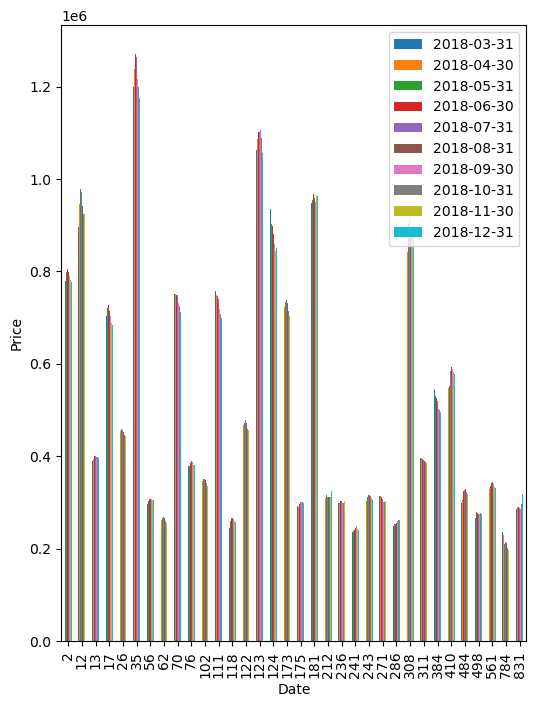

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a bar chart based off of the group series from before
avg_price = selected_data_ca_18.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
avg_price.set_xlabel("Date")
avg_price.set_ylabel("Price")

plt.show()
plt.tight_layout()

In [12]:
df_texas = df[df['StateName']== 'TX']
df_texas

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
4,394514,4,"Dallas, TX",msa,TX,325253.0,330319.0,333613.0,333632.0,330298.0,...,404630.0,416630.0,432667.0,444300.0,448967.0,446300.0,442833.0,437167.0,432167.0,427300.0
5,394692,5,"Houston, TX",msa,TX,294633.0,298000.0,299666.0,299996.0,299663.0,...,351300.0,357967.0,366332.0,372998.0,374998.0,373000.0,370317.0,366982.0,363982.0,361082.0
24,395055,24,"San Antonio, TX",msa,TX,260967.0,264300.0,267667.0,269667.0,269967.0,...,333000.0,339333.0,346300.0,353300.0,355300.0,355000.0,351333.0,348000.0,344333.0,339667.0
29,394355,29,"Austin, TX",msa,TX,363492.0,370125.0,373458.0,374967.0,373333.0,...,526480.0,540480.0,554092.0,561758.0,562762.0,557967.0,549967.0,543217.0,538250.0,531583.0
66,394843,67,"McAllen, TX",msa,TX,185833.0,186633.0,188267.0,189933.0,189967.0,...,260633.0,260967.0,257633.0,253283.0,249950.0,249950.0,249967.0,248967.0,245633.0,242300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,395142,933,"Sweetwater, TX",msa,TX,124471.0,117938.0,111604.0,109633.0,115083.0,...,150967.0,141150.0,141150.0,137833.0,146133.0,156133.0,166967.0,183633.0,187267.0,179933.0
921,394968,934,"Pecos, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,219500.0,199167.0,190833.0,221333.0,252500.0,272500.0,279000.0,283167.0
922,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,146833.0,147467.0,149633.0,147383.0,147250.0,147250.0,150667.0,146750.0,147917.0,149583.0
925,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,94241.0,100075.0,102772.0,104417.0,99417.0,101333.0,107417.0,117500.0,128167.0,132333.0


In [13]:
df_texas.to_csv('output/mlp_texas.csv', index=False)

In [14]:
df_florida = df[df['StateName']== 'FL']
df_florida

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
8,394856,8,"Miami, FL",msa,FL,427500.0,431000.0,433333.0,435300.0,433300.0,...,654667.0,674667.0,691333.0,699666.0,700000.0,700000.0,700000.0,700000.0,703333.0,710000.0
18,395148,18,"Tampa, FL",msa,FL,256100.0,260267.0,264933.0,267633.0,267600.0,...,413233.0,420633.0,431300.0,441267.0,447633.0,447967.0,447967.0,446633.0,444967.0,441633.0
22,394943,22,"Orlando, FL",msa,FL,294267.0,299600.0,304633.0,306333.0,306300.0,...,441333.0,448333.0,456663.0,463663.0,468330.0,471667.0,473300.0,473167.0,469833.0,466267.0
39,394714,40,"Jacksonville, FL",msa,FL,279967.0,283933.0,286967.0,287271.0,286136.0,...,372667.0,381833.0,393500.0,406500.0,414333.0,417667.0,416333.0,414000.0,409000.0,403967.0
72,753906,73,"North Port, FL",msa,FL,349600.0,349900.0,349900.0,349900.0,349900.0,...,578333.0,586333.0,583167.0,579667.0,572333.0,564000.0,555633.0,549967.0,554758.0,561425.0
77,394440,78,"Cape Coral, FL",msa,FL,304617.0,306283.0,307033.0,304083.0,302383.0,...,152333.0,186000.0,220333.0,245300.0,269933.0,294930.0,314963.0,330663.0,342300.0,348933.0
81,394766,82,"Lakeland, FL",msa,FL,213299.0,216600.0,218133.0,219633.0,219633.0,...,349930.0,349930.0,349933.0,351600.0,353267.0,356600.0,358267.0,358300.0,354967.0,351667.0
89,394528,90,"Deltona, FL",msa,FL,247667.0,249300.0,252633.0,256267.0,259300.0,...,379750.0,384750.0,388083.0,390000.0,392332.0,395332.0,398332.0,399000.0,399000.0,399000.0
96,394957,97,"Palm Bay, FL",msa,FL,257633.0,260800.0,262767.0,264467.0,265267.0,...,371567.0,373233.0,376567.0,378267.0,381600.0,382117.0,383783.0,382275.0,381791.0,379775.0
110,394971,111,"Pensacola, FL",msa,FL,226667.0,229983.0,234817.0,238117.0,239133.0,...,334973.0,341325.0,347992.0,351333.0,351667.0,349133.0,347450.0,344083.0,341450.0,339467.0


In [15]:
df_florida.to_csv('output/mlp_florida.csv', index=False)

In [16]:
df_newyork = df[df['StateName']== 'NY']
df_newyork

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,394913,1,"New York, NY",msa,NY,492633.0,499333.0,507966.0,516633.0,522967.0,...,634633.0,644967.0,658300.0,666667.0,676600.0,676998.0,681938.0,684967.0,687902.0,687629.0
49,394425,50,"Buffalo, NY",msa,NY,164967.0,171600.0,176567.0,179933.0,179933.0,...,206600.0,214933.0,224900.0,233267.0,239117.0,241483.0,235650.0,229833.0,225800.0,223267.0
51,395031,52,"Rochester, NY",msa,NY,164567.0,172233.0,176567.0,179900.0,176567.0,...,188300.0,194933.0,199900.0,204900.0,206567.0,208567.0,206933.0,205267.0,200300.0,191933.0
63,394308,64,"Albany, NY",msa,NY,214267.0,216300.0,217967.0,221300.0,224633.0,...,284667.0,296333.0,306300.0,314933.0,319900.0,319933.0,318967.0,312967.0,309600.0,301933.0
85,845159,86,"Poughkeepsie, NY",msa,NY,NaN,NaN,NaN,NaN,NaN,...,412000.0,425000.0,436633.0,447967.0,452933.0,457967.0,463300.0,473300.0,481300.0,488967.0
90,395143,91,"Syracuse, NY",msa,NY,147100.0,153133.0,156800.0,159267.0,159900.0,...,198217.0,204917.0,209967.0,221600.0,227500.0,229167.0,224200.0,221383.0,213050.0,206350.0
167,395179,169,"Utica, NY",msa,NY,130783.0,134917.0,138250.0,141600.0,143300.0,...,174900.0,181567.0,191100.0,197467.0,200800.0,199600.0,199900.0,204900.0,204900.0,204833.0
193,394387,195,"Binghamton, NY",msa,NY,120083.0,123717.0,129017.0,133233.0,135600.0,...,168150.0,173583.0,176133.0,176600.0,176233.0,176267.0,179450.0,179817.0,177817.0,174000.0
237,394748,241,"Kingston, NY",msa,NY,266200.0,269567.0,274333.0,277667.0,279300.0,...,429667.0,451000.0,472667.0,492150.0,499150.0,502150.0,506217.0,505883.0,506183.0,499300.0
324,394719,328,"Jamestown, NY",msa,NY,117308.0,119675.0,124708.0,131633.0,136300.0,...,142783.0,153617.0,165583.0,175583.0,179450.0,179483.0,171333.0,163333.0,155333.0,150333.0


In [17]:
df_newyork.to_csv('output/mlp_newyork.csv', index=False)

In [18]:
df_pennsylvania = df[df['StateName']== 'PA']
df_pennsylvania

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
7,394974,7,"Philadelphia, PA",msa,PA,226600.0,235800.0,245800.0,254133.0,257967.0,...,295000.0,303333.0,312625.0,320958.0,323958.0,322967.0,322967.0,323300.0,323300.0,316633.0
27,394982,27,"Pittsburgh, PA",msa,PA,161600.0,166300.0,171333.0,174633.0,173267.0,...,190667.0,198967.0,209300.0,216300.0,221300.0,221633.0,221633.0,219967.0,219800.0,216433.0
69,394318,70,"Allentown, PA",msa,PA,202933.0,209600.0,217800.0,222833.0,224800.0,...,314600.0,325467.0,330353.0,335353.0,334520.0,335500.0,331500.0,329800.0,328933.0,328267.0
98,394666,99,"Harrisburg, PA",msa,PA,174150.0,178583.0,184267.0,187700.0,188933.0,...,231300.0,239600.0,242933.0,249900.0,253267.0,258267.0,261600.0,258233.0,254900.0,244233.0
100,395075,101,"Scranton, PA",msa,PA,133233.0,137267.0,143933.0,147300.0,151633.0,...,226333.0,229000.0,233967.0,237633.0,236300.0,231333.0,224665.0,223332.0,221832.0,221800.0
103,394768,104,"Lancaster, PA",msa,PA,229900.0,232233.0,233900.0,232417.0,233417.0,...,304933.0,319967.0,325817.0,330800.0,332117.0,331133.0,331117.0,326467.0,328267.0,324633.0
121,395244,122,"York, PA",msa,PA,189100.0,192433.0,195767.0,201600.0,202938.0,...,252033.0,258683.0,266567.0,273233.0,273233.0,271567.0,269100.0,265800.0,262500.0,259967.0
127,395015,128,"Reading, PA",msa,PA,160217.0,164965.0,171598.0,178298.0,184933.0,...,229998.0,238298.0,249932.0,259933.0,268300.0,271333.0,274633.0,279300.0,279600.0,277933.0
182,394572,184,"Erie, PA",msa,PA,131617.0,134950.0,139967.0,141600.0,140517.0,...,165433.0,178767.0,184267.0,194267.0,190633.0,196108.0,196033.0,198850.0,196042.0,193150.0
259,394553,263,"East Stroudsburg, PA",msa,PA,162950.0,165617.0,167600.0,169267.0,169933.0,...,318333.0,326333.0,335667.0,343667.0,347163.0,349463.0,349463.0,348967.0,346667.0,346500.0


In [19]:
df_pennsylvania.to_csv('output/mlp_pennsylvania.csv', index=False)

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\3743621223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\3743621223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykerne

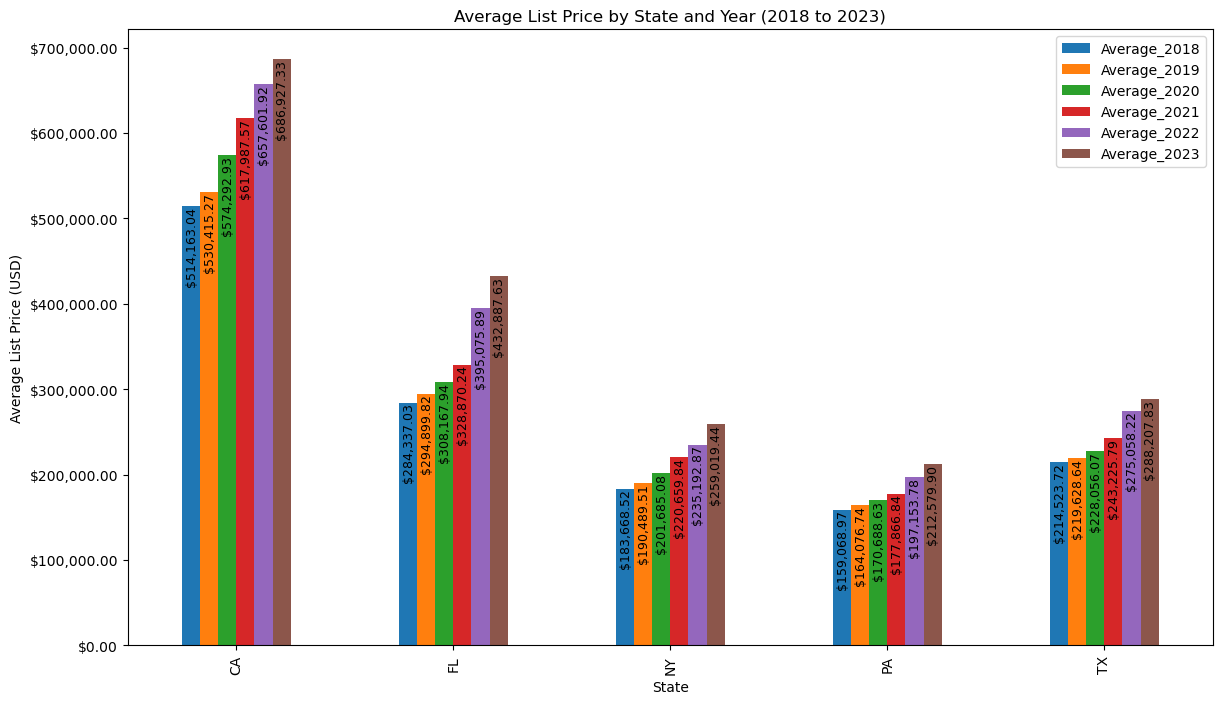

In [20]:
# Select and create the columns I want
selected_columns = ['StateName'] + [col for col in df.columns if any(year in col for year in ['2018', '2019', '2020', '2021', '2022', '2023'])]
selected_data = df[selected_columns]
# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]
# Create a new column for each year and calculate the average for each
for year in range(2018, 2024):
    selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
# Group by state and select the average for each year
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_{year}' for year in range(2018, 2024)]].mean()
# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Year (2018 to 2023)')
# Format y-axis labels to display in dollars
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
# Annotate each bar with its exact value vertically and make the font bold
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',  # Adjust va to 'center' to place text inside the bar
                xytext=(0, 0),  # Adjust xytext for vertical position inside the bar
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')  # Rotate the text vertically

plt.savefig('visuals/Average List Price by State and Year.png')

plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\1209158897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\1209158897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\L

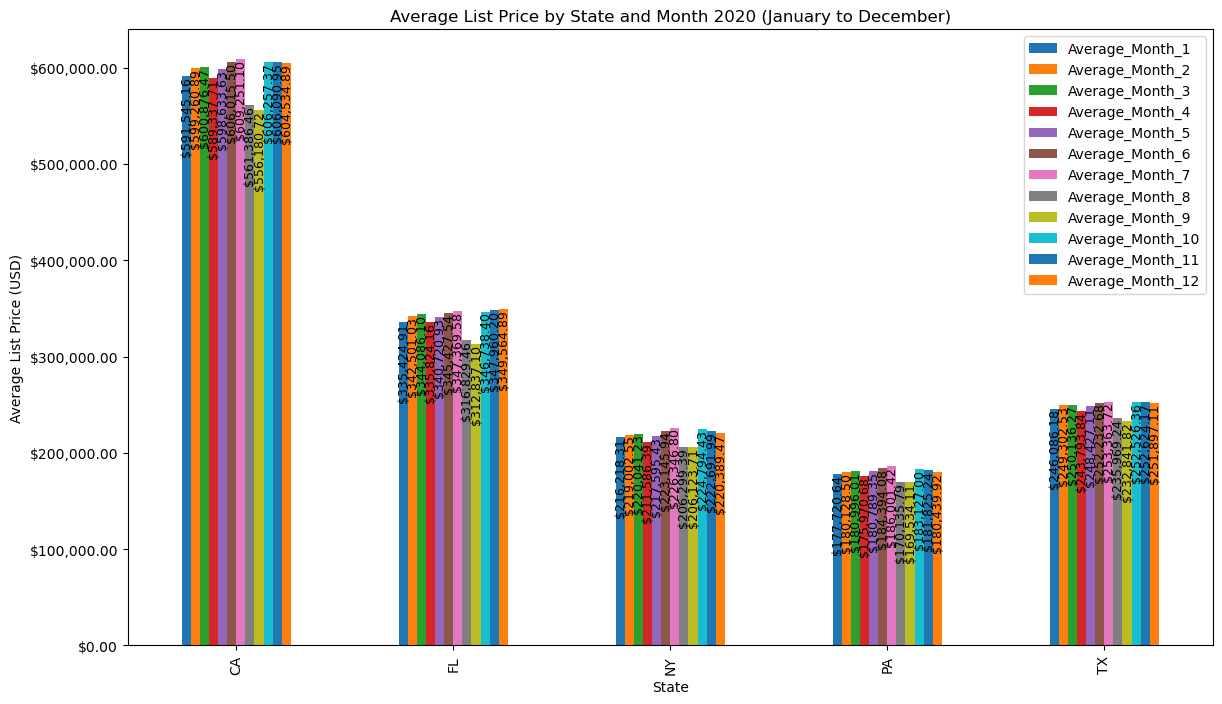

In [21]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '20' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    selected_data_ny_tx[f'Average_Month_{month}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{month}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2020 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Annotate each bar with its exact value vertically and make the font bold
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',
                xytext=(0, 0),
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')
    
plt.savefig('visuals/Average List Price by State and Month 2020.png')

plt.show()

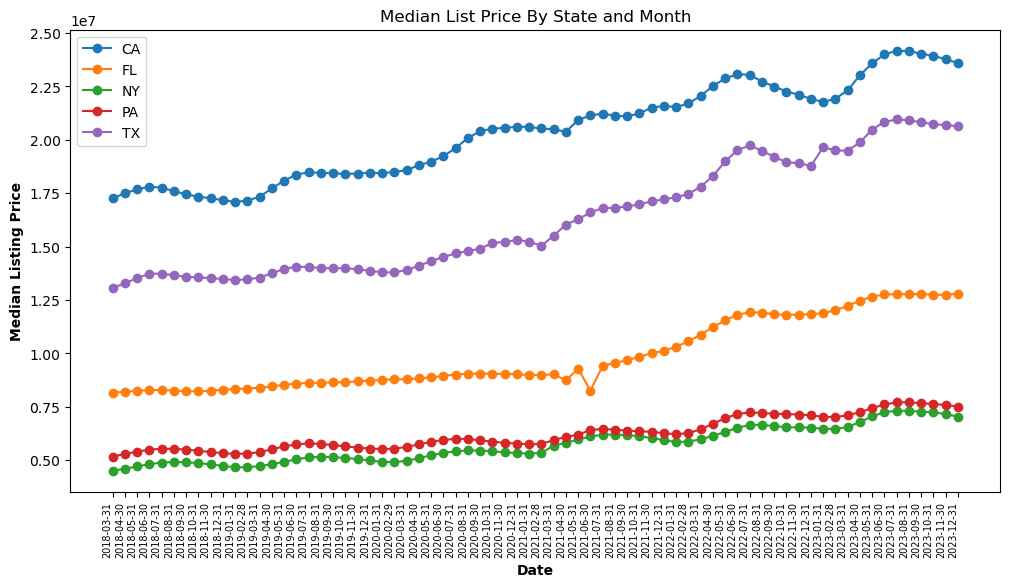

In [22]:
# List of states to filter
states_to_filter = ['CA', 'FL', 'NY', 'PA', 'TX']
# Find the index of the '3/31/2018' column
start_column_index = df.columns.get_loc('2018-03-31')
# Prepare data for plotting
data = {'Date': []}
for state_to_filter in states_to_filter:
    data[state_to_filter] = []
for column_index in range(start_column_index, len(df.columns)):
    column_name = df.columns[column_index]
    data['Date'].append(column_name)
    for state_to_filter in states_to_filter:
        column_sum_for_state = df.loc[df['StateName'] == state_to_filter, column_name].sum()
        data[state_to_filter].append(column_sum_for_state)
# Convert data to DataFrame
line_df = pd.DataFrame(data)
# Plot the line chart
plt.figure(figsize=(12, 6))
for state_to_filter in states_to_filter:
    plt.plot(line_df['Date'], line_df[state_to_filter], label=state_to_filter, marker='o')
# Set labels and title
plt.xlabel('Date', fontweight='bold')  # Make 'Date' label bold
plt.ylabel('Median Listing Price', fontweight='bold')  # Make 'Total Listings' label bold
plt.title('Median List Price By State and Month')
plt.xticks(rotation=90, ha='right', fontsize=7)
# Show legend
plt.legend()
# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=7)
# Save the chart as an image (PNG format in this example)
plt.savefig('visuals/median_ list_price_by_state_and_month.png')
# Display the plot
plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\2205621854.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\2205621854.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy

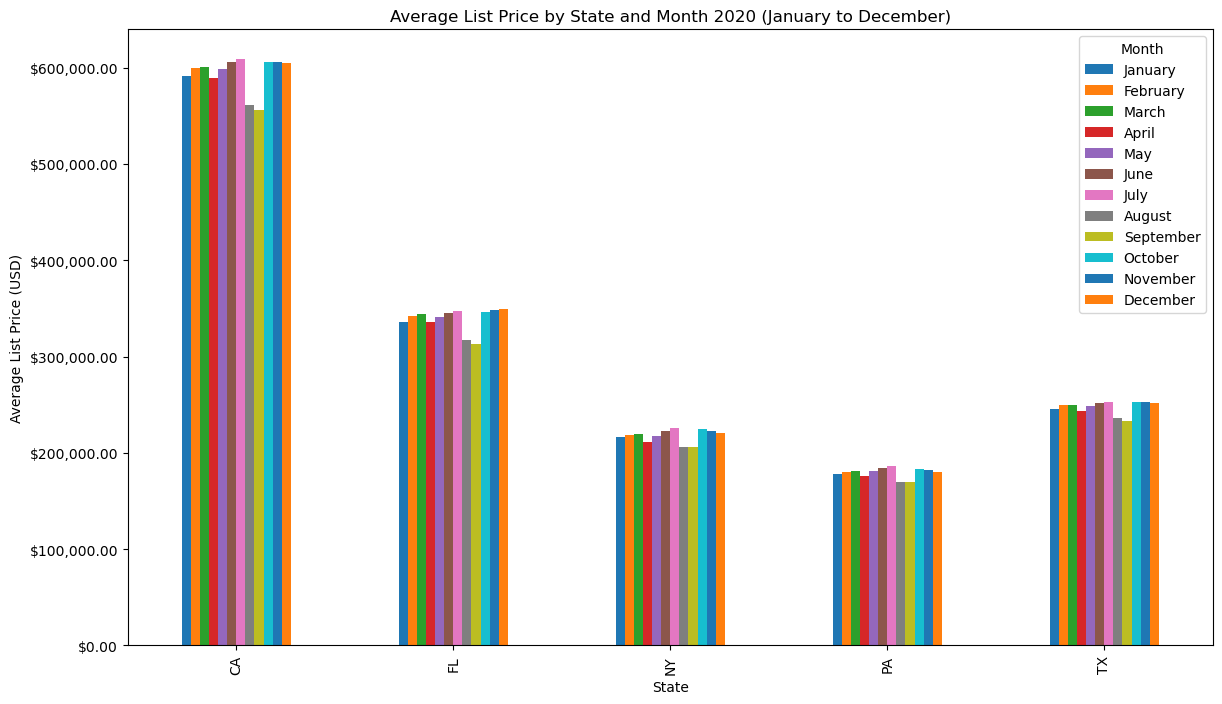

In [32]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '20' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    month_name = calendar.month_name[month]  # Use calendar module to get month name
    selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{calendar.month_name[month]}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2020 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Use month names in the legend
month_names = [calendar.month_name[month] for month in range(1, 13)]
ax.legend(month_names, title='Month')

plt.savefig('visuals/2020 Average List Price by State and Month.png')

plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\3645313303.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\3645313303.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy

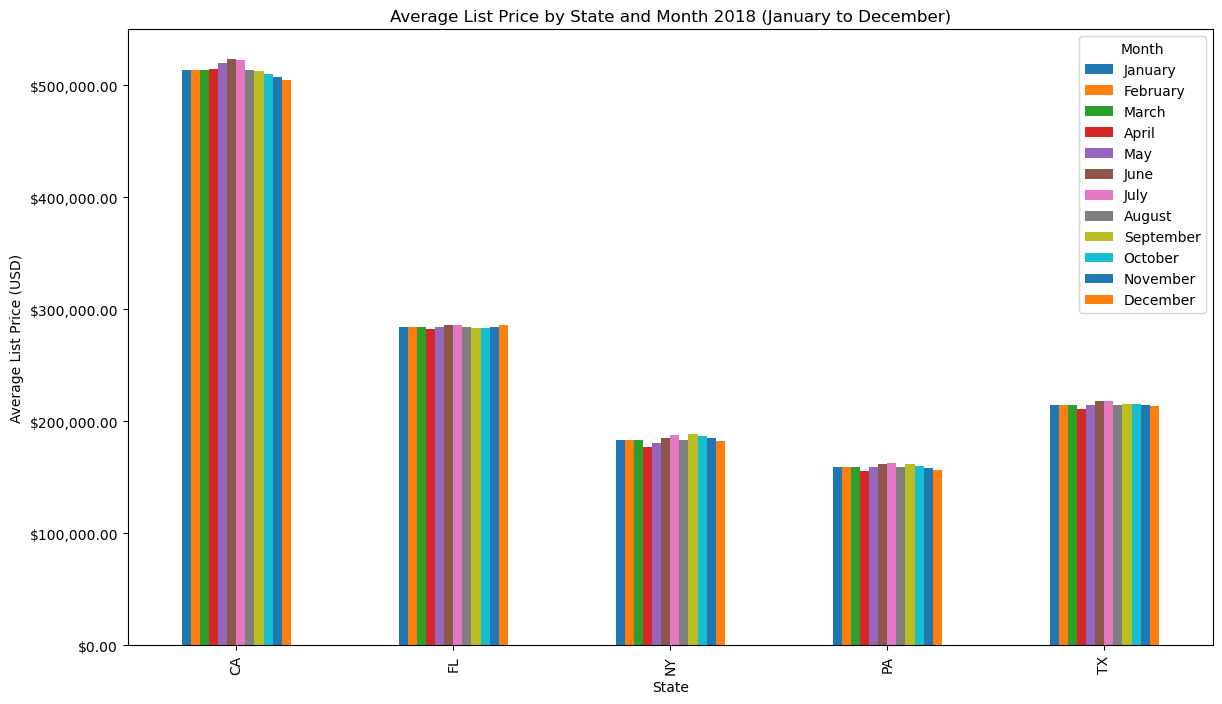

In [33]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '18' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    month_name = calendar.month_name[month]  # Use calendar module to get month name
    selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{calendar.month_name[month]}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2018 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Use month names in the legend
month_names = [calendar.month_name[month] for month in range(1, 13)]
ax.legend(month_names, title='Month')

plt.savefig('visuals/2018 Average List Price by State and Month.png')

plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\1466500586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\1466500586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy

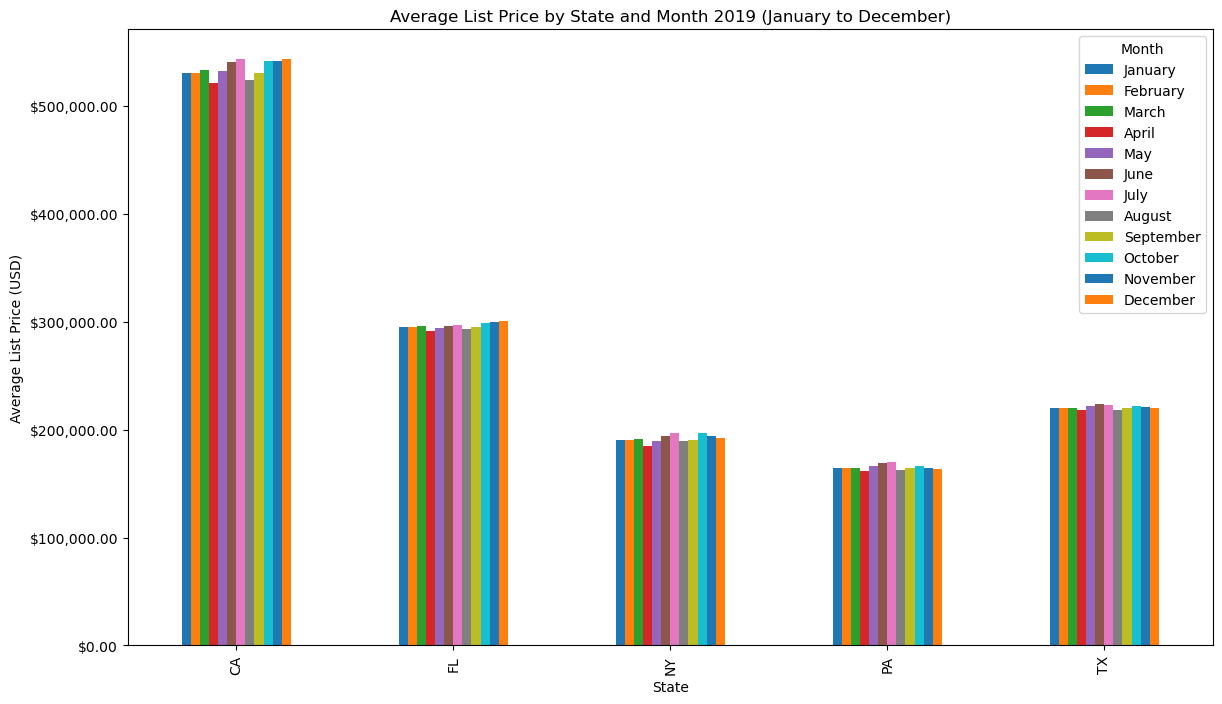

In [34]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '19' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    month_name = calendar.month_name[month]  # Use calendar module to get month name
    selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{calendar.month_name[month]}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2019 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Use month names in the legend
month_names = [calendar.month_name[month] for month in range(1, 13)]
ax.legend(month_names, title='Month')

plt.savefig('visuals/2019 Average List Price by State and Month.png')

plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\1143487304.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\1143487304.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy

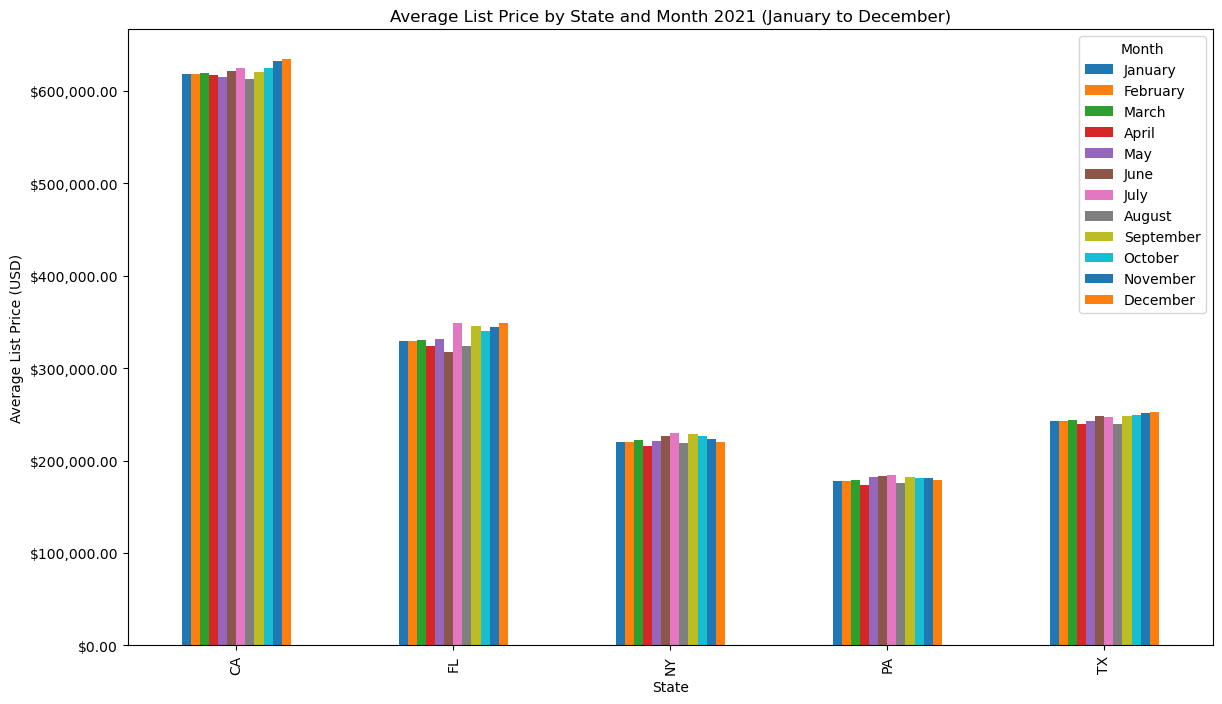

In [35]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '21' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    month_name = calendar.month_name[month]  # Use calendar module to get month name
    selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{calendar.month_name[month]}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2021 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Use month names in the legend
month_names = [calendar.month_name[month] for month in range(1, 13)]
ax.legend(month_names, title='Month')

plt.savefig('visuals/2021 Average List Price by State and Month.png')

plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\338665788.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\338665788.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\A

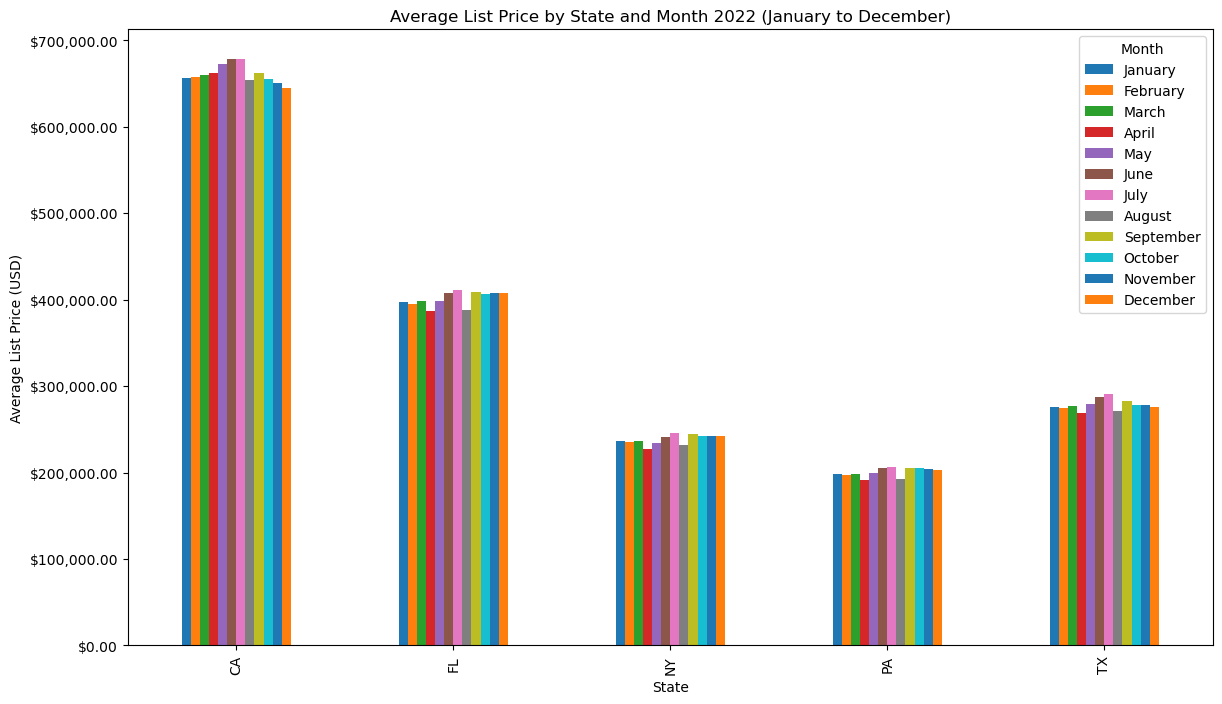

In [36]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '22' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    month_name = calendar.month_name[month]  # Use calendar module to get month name
    selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{calendar.month_name[month]}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2022 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Use month names in the legend
month_names = [calendar.month_name[month] for month in range(1, 13)]
ax.legend(month_names, title='Month')

plt.savefig('visuals/2022 Average List Price by State and Month.png')

plt.show()

C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\3685884798.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\3685884798.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)
C:\Users\mindy

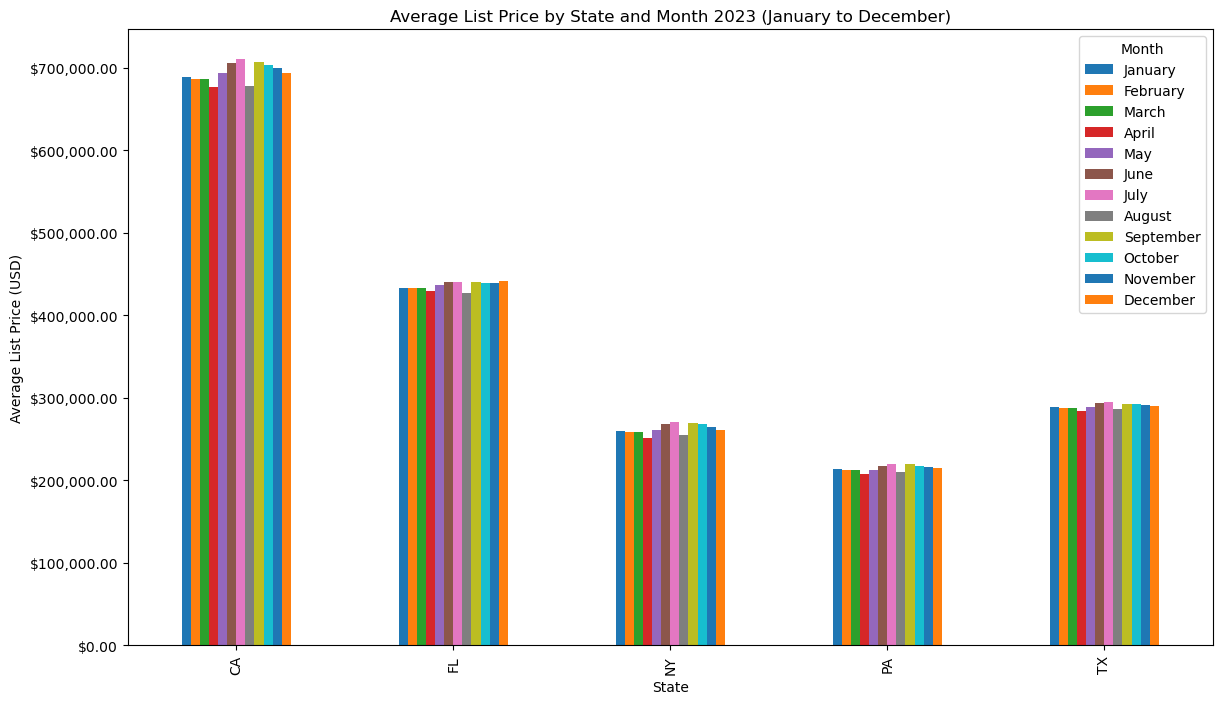

In [37]:
# Select columns for StateName and months
selected_columns = ['StateName'] + [col for col in df.columns if '23' in col]

# Select relevant columns
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each month and calculate the average for each
for month in range(1, 13):  # Assuming months are represented by integers 1 through 12
    month_name = calendar.month_name[month]  # Use calendar module to get month name
    selected_data_ny_tx[f'Average_Month_{month_name}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(month)).mean(), axis=1)

# Group by state and select the average for each month
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_Month_{calendar.month_name[month]}' for month in range(1, 13)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Month 2023 (January to December)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Use month names in the legend
month_names = [calendar.month_name[month] for month in range(1, 13)]
ax.legend(month_names, title='Month')

plt.savefig('visuals/2023 Average List Price by State and Month.png')

plt.show()

In [31]:
#Read in csv regarding: New Construction Sales Count: The number of unique new construction homes that sold during the month. \
#Available for the raw cut of single family residence and condo.

df2 = pd.read_csv('Metro_new_con_sales_count_raw_uc_sfrcondo_month.csv')
df2.head(15)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,102001,0,United States,country,NaN,37135.0,36493.0,46908.0,41663.0,44510.0,...,31489.0,43172.0,38025.0,43180.0,42573.0,34298.0,37424.0,34157.0,32067.0,30929.0
1,394913,1,"New York, NY",msa,NY,520.0,436.0,533.0,503.0,574.0,...,326.0,423.0,319.0,425.0,465.0,340.0,433.0,372.0,363.0,340.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,520.0,...,161.0,228.0,162.0,200.0,216.0,159.0,159.0,177.0,169.0,219.0
3,394463,3,"Chicago, IL",msa,IL,344.0,345.0,435.0,480.0,561.0,...,325.0,493.0,466.0,456.0,498.0,402.0,507.0,433.0,392.0,501.0
4,394514,4,"Dallas, TX",msa,TX,1502.0,1628.0,2183.0,1920.0,1757.0,...,1744.0,2220.0,1932.0,2056.0,1973.0,1568.0,1717.0,1510.0,1409.0,1341.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1796.0,...,1859.0,2329.0,1987.0,2208.0,2141.0,1705.0,1719.0,1707.0,1567.0,1802.0
6,395209,6,"Washington, DC",msa,VA,1205.0,1005.0,1334.0,968.0,1078.0,...,498.0,632.0,590.0,629.0,593.0,560.0,567.0,521.0,501.0,474.0
7,394974,7,"Philadelphia, PA",msa,PA,340.0,259.0,290.0,307.0,365.0,...,172.0,245.0,266.0,272.0,316.0,266.0,246.0,206.0,235.0,222.0
8,394856,8,"Miami, FL",msa,FL,550.0,513.0,856.0,751.0,795.0,...,170.0,272.0,244.0,244.0,273.0,240.0,242.0,244.0,238.0,251.0
9,394347,9,"Atlanta, GA",msa,GA,1715.0,2025.0,2472.0,2086.0,2026.0,...,1035.0,1438.0,1188.0,1380.0,1278.0,1035.0,1081.0,1040.0,993.0,946.0


C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\557702961.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_states[f'Average_{year}'] = selected_data_states.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipykernel_43556\557702961.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_states[f'Average_{year}'] = selected_data_states.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
C:\Users\mindy\AppData\Local\Temp\ipyk

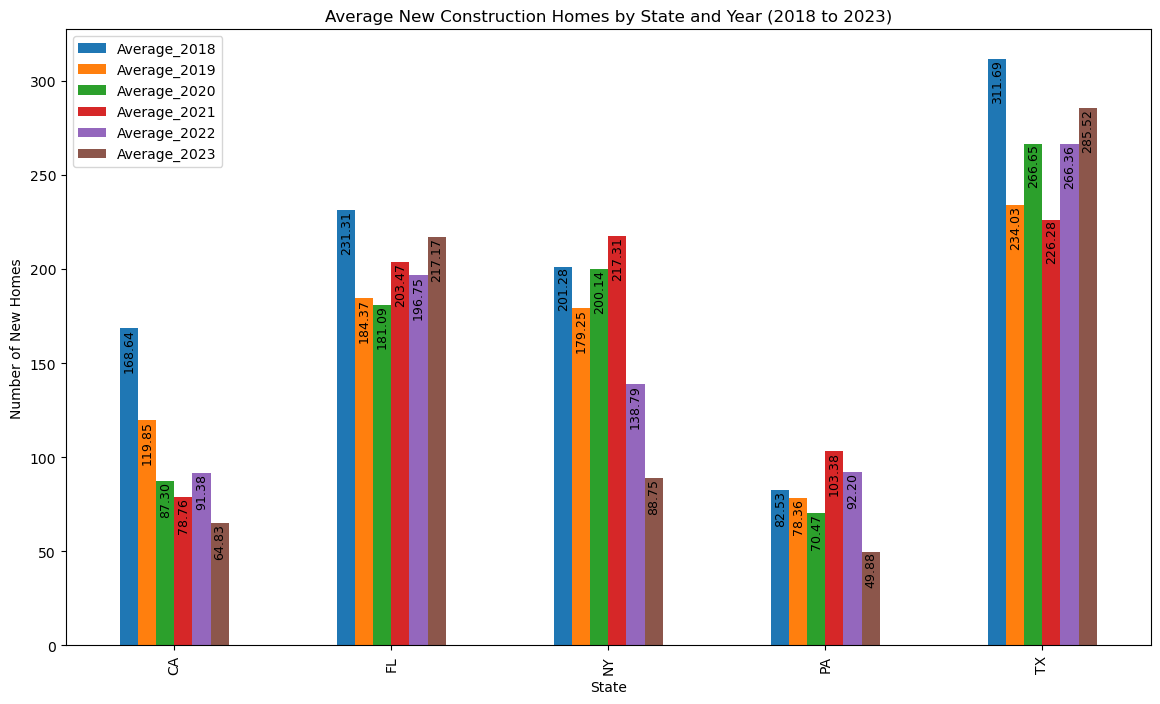

In [40]:
# Select and create the columns I want
selected_columns = ['StateName'] + [col for col in df2.columns if any(year in col for year in ['2018', '2019', '2020', '2021', '2022', '2023'])]
selected_data = df2[selected_columns]

# Filter the data for proper states
selected_data_states = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each year and calculate the average for each
for year in range(2018, 2024):
    selected_data_states[f'Average_{year}'] = selected_data_states.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)

# Group by state and select the average for each year
grouped_df = selected_data_states.groupby('StateName')[[f'Average_{year}' for year in range(2018, 2024)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Number of New Homes')
ax.set_xlabel('State')
ax.set_title('Average New Construction Homes by State and Year (2018 to 2023)')

# Annotate each bar with its exact value vertically and make the font bold
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',  # Adjust va to 'center' to place text inside the bar
                xytext=(0, 0),  # Adjust xytext for vertical position inside the bar
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')  # Rotate the text vertically

plt.savefig('visuals/Average New Construction Homes by State and Year.png')
plt.show()